In [55]:
import pandas as pd
import random
import string

In [56]:
d={1:['1','Burgers','4.25'],2:['2','Nuggets','2.50'],3:['3','French Fries','2.00'],
   4:['4','Small Drink','1.25'],5:['5','Medium Drink','1.50'],6:['6','Large Drink','1.75'],7:['7','Salad','3.75']}


In [57]:
df=pd.DataFrame(d)
df=df.transpose()
df

,0,1,2
1,1,Burgers,4.25
2,2,Nuggets,2.50
3,3,French Fries,2.00
4,4,Small Drink,1.25
5,5,Medium Drink,1.50
6,6,Large Drink,1.75
7,7,Salad,3.75


In [58]:
temp=float(d[1][2])+float(d[3][2])
A1=temp+float(d[4][2])
A1=A1*.20
A2=temp+float(d[5][2])
A2=A2*.20
A3=temp+float(d[6][2])
A3=A3*.20
print(A1,A2,A3)
    
temp=float(d[1][2])+float(d[2][2])+float(d[7][2])
B1=temp+float(d[4][2])
B1=B1*.35
B2=temp+float(d[5][2])
B2=B2*.35
B3=temp+float(d[6][2])
B3=B3*.35
print(B1,B2,B3)
discount_price = {'A1':1.5,'A2':1.55,'A3':1.6,'B1':4.1125,'B2':4.2,'B3':4.2875,'SA1':3.0,'SA2':3.1,'SA3':3.2}


1.5 1.55 1.6
4.1125 4.199999999999999 4.2875


In [59]:
for i in d:
    print(d[i][0] +'.'+d[i][1] +'-'+d[i][2])

1.Burgers-4.25
2.Nuggets-2.50
3.French Fries-2.00
4.Small Drink-1.25
5.Medium Drink-1.50
6.Large Drink-1.75
7.Salad-3.75


In [60]:
# print("Combo Offers are.. \n A) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% Discount [13 any of 4,5,6]")
# print(" B) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% Discount [127 any of 456]")

In [61]:
A=[[1,3,4],[1,3,5],[1,3,6]]
SA=[[1,3,4,1,3,4],[1,3,5,1,3,5],[1,3,6,1,3,6]]
B=[[1,2,7,4],[1,2,7,5],[1,2,7,6]]

def split(word): 
    return [char for char in word]  
print(A,'\n''\n''\n',SA,'\n''\n''\n',B)

[[1, 3, 4], [1, 3, 5], [1, 3, 6]] 


 [[1, 3, 4, 1, 3, 4], [1, 3, 5, 1, 3, 5], [1, 3, 6, 1, 3, 6]] 


 [[1, 2, 7, 4], [1, 2, 7, 5], [1, 2, 7, 6]]


In [62]:
print("Combo Offers are.. \n A) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% Discount [13 any of 4,5,6]")
print(" B) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% Discount [127 any of 456]")
day_count=1
no=[]
day=[]
# SINCE OCTOBER
while(day_count<=31):
    j=0
    ch='y'
    total_cost_per_day=0
    count_customer_day=random.randint(20,50)
    while(count_customer_day>0):
        
#   IGNORE THIS  order=input("Enter the order: ")--------------   
#   IGNORE THIS   order=''.join(random.choices(string.digits, k=random.randint(3,7)))

        order=[]

        for i in range(random.randint(3,7)):
            order.append(random.randint(1,7))
            
        order=split(order)
        initial_cost=0 
        
        #initializing cost to 0     

        for i in order:
            initial_cost=initial_cost+float(d[int(i)][2])


        arr=[]

        # to convert string to integer values    
        def convert_to_int(order):
            for i in order:
                arr.append(int(i))

        convert_to_int(order)
        arr.sort()

        # IGNORE THIS all(x in A[1] for x in arr)

        # COMBOS 

        combo=[]
        for i in range(0,3):
            if(all(x in arr for x in B[i])):
                combo.append('B' + str(i+1))

            elif(all(x in arr for x in A[i])):
                combo.append('A'+str(i+1))

            elif(all(x in arr for x in SA[i]) and arr.count(3)==2 and arr.count(1)==2 and (arr.count(5)==2 or arr.count(4)==2 or arr.count(6)==2) ):
                combo.append('SA' +str(i+1))
                break

        # By placing B[i] above other if statements even if there is a possibility of availing multiple combo offers in an order, 
        # the program will select B over A. (Since it has the maximum discount) 


        for i in range(len(combo)):
            initial_cost= initial_cost - discount_price[combo[i]]     

        final_cost=initial_cost + (initial_cost *.18)
        # Number of customers
        j=j+1 
        total_cost_per_day+=final_cost
#  IGNORE THIS       ch=input("Is there another "+str(j+1)+" customer?")------------
        count_customer_day-=1
    day.append(total_cost_per_day)
    no.append(day_count)
    day_count+=1



Combo Offers are.. 
 A) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% Discount [13 any of 4,5,6]
 B) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% Discount [127 any of 456]


Text(0,0.5,'Profit')

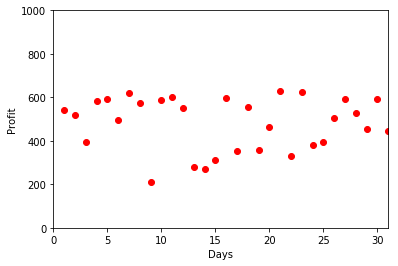

In [63]:
# Plotting PROFIT 


import matplotlib.pyplot as plt
plt.plot(no, day,'ro')
plt.axis([0, 31, 0, 1000])
plt.xlabel('Days')
plt.ylabel('Profit')